In [2]:
import pandas as pd 
import numpy as np

In [93]:
def load_and_process(path_to_csv):
    
    df = (
    pd.read_csv(path_to_csv)
    .loc[lambda x: x['STOLEN_VALUE']>1000]
        .drop(['ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'POPULATION_GROUP_CODE', 'OFFENSE_CODE', 'VICTIM_TYPE_CODE', 'LOCATION_CODE', 'WEAPON_CODE', 'PROP_DESC_ID', 'PROP_DESC_CODE'], axis=1)
    .sort_values("DATA_YEAR", ascending = True)
    .rename(columns={
    "COUNTY_NAME" : "County_Name",
    "POPULATION_GROUP_DESC": "Population_Description", 
    "REGION_NAME" : "Region_Name",
    "DATA_YEAR" : "Year",
    "STATE_NAME" : "State",
    "DIVISION_NAME" : "Division",
    "COUNTY_NAME" : "County",
    "REGION_NAME" : "Region",
    "OFFENSE_NAME" : "Offense",
    "OFFENDER_RACE" : "Offender_Race",
    "OFFENDER_ETHNICITY" : "Offender_Ethnicity",
    "OFFENDER_AGE" : "Offender_Age",
    "OFFENDER_SEX" : "Offender_Sex",
    "VICTIM_TYPE_NAME" : "Victim_Type",
    "LOCATION_NAME" : "Location",
    "WEAPON_NAME" : "Weapon",
    "PROP_DESC_NAME" : "Property_Type",
    "STOLEN_VALUE" : "Stolen_Value",
    "RECOVERED_VALUE" : "Recovered_Value",
    "RECOVERED_FLAG" : "Recovered?",
    "DATE_RECOVERED" : "Recovery_Date"
})
    )
    
    
    return df



df=load_and_process("../../Dataset.csv")



---
## Lets do some exploration of our dataset now



Lets start by getting the general structure of our dataset

In [94]:
df.head()

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
45880,2013,Virginia,South Atlantic,NEWPORT NEWS CITY,South,"Cities from 100,000 thru 249,999",All Other Larceny,NaN,NaN,NaN,NaN,Individual,Parking/Drop Lot/Garage,NaN,Consumable Goods,3000.0,0.0,N,NaN
38924,2013,Tennessee,East South Central,SULLIVAN; CARTER; WASHINGTON,South,"Cities from 50,000 thru 99,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Money,2000.0,0.0,N,NaN
38736,2013,Florida,South Atlantic,MIAMI-DADE,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Commercial/Office Building,NaN,Radio/ TV/ VCR,6576.0,0.0,N,NaN
38214,2013,Tennessee,East South Central,SHELBY,South,"Cities from 500,000 thru 999,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Commercial/Office Building,NaN,Radio/ TV/ VCR,1200.0,0.0,N,NaN
38213,2013,Tennessee,East South Central,SHELBY,South,"Cities from 500,000 thru 999,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Other/Unknown,NaN,Radio/ TV/ VCR,4000.0,0.0,N,NaN


We see our dataset contains 19 columns of interesting variables and is being sorted by the year of occurence starting in 2013

Lets see how many rows we have...

In [95]:
print("We have {} rows\n\n\n".format(df["Year"].count()))

We have 21111 rows





Now lets take a look at some of the largest and smallest values of some of the columns were interested in...

I am interested in looking at some of the values that were stolen, we know from our import that we are limiting the dataset to values of goods stolen to be greater than 1000 so this would be assumed to be the minimum. Lets look at the maximum then: 

In [96]:
print("The maximum value of goods stolen was: {}\n\n\n".format(df["Stolen_Value"].max()))
#Thats expensive

The maximum value of goods stolen was: 250000000.0





How about the average cost of goods stolen?

In [97]:
print("The average value of goods stolen was: {}\n\n\n".format(df["Stolen_Value"].mean()))

The average value of goods stolen was: 39663.855193974705





---
## Lets take a look at the regions given in the dataframe and compare them

The regions in our data set can be seen to cover the following area

![Image](../../images/regionsmapFBI.gif)

*Image taken from https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/area-definitions*

### First lets see which area has the most crime

We see from the graph that clearly the South region has the most crime



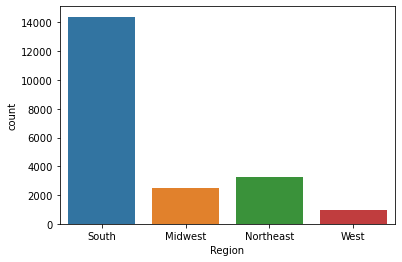

In [98]:
def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame)
    
theft_by_area(df)

print("We see from the graph that clearly the South region has the most crime\n")

Looking at the percentages, the South region has more crime than all the other regions combined



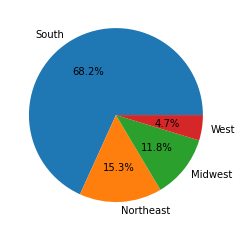

In [99]:
def theft_by_area_pie(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pie_graph=plt.pie(dataFrame["Region"].value_counts(),labels=dataFrame["Region"].value_counts().iloc[:4].index,autopct='%1.1f%%')
    
theft_by_area_pie(df)

print("Looking at the percentages, the South region has more crime than all the other regions combined\n")

Lets take a look at the values of goods stolen on average from those areas


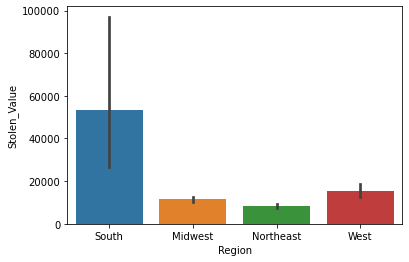

In [100]:
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen_Value",data=dataFrame)
    
averages_values_stolen_by_area(df)

Again we see that the South Region has the most value on average that has been stolen. This high average may have to do with the large amount of outliers that appear to be present over this range though so lets try and take those large outliers out.

In [101]:
(df["Stolen_Value"]>1000000).value_counts()

False    21077
True        34
Name: Stolen_Value, dtype: int64

There are 34 values over \$ 1,000,000 so lets remove them

In [102]:
df_without_outliers=df[df["Stolen_Value"]<1000000]

Now using the similar graph as above we see a more uniform graph with less effect of outliers

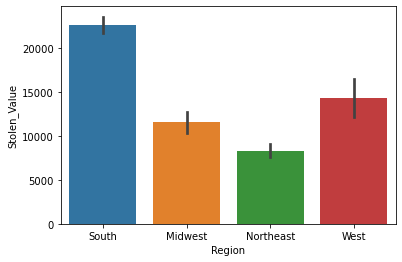

In [103]:
averages_values_stolen_by_area(df_without_outliers)

---
### We could also take a look at the most common items stollen


Lets start by looking at the top 5 items that are stollen from all areas

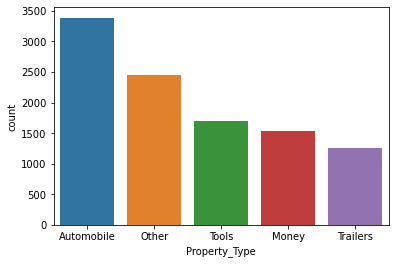

In [104]:

def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    unique5_items=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property_Type",data=dataframe,order=unique5_items)
    
top_5_stolen(df)





**We see that the most commonly stolen item is an automobile category**

If we take a look at the average value of theses for 5 items that has been stolen and include items that were or weren't recovered (while ignoring the outliers again) 

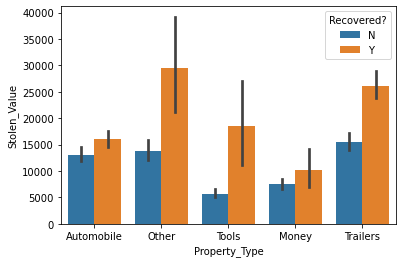

In [105]:
def average_value_top_5_stolen(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    unique5_items=dataFrame["Property_Type"].value_counts().iloc[:5].index
    average_top_5=sns.barplot(x="Property_Type",y="Stolen_Value",hue="Recovered?",data=dataFrame,order=unique5_items)


average_value_top_5_stolen(df_without_outliers)

Interestingly, although Automobile is most commonly stolen it is not the heightest average value for goods stolen within these top 5